In [380]:
'''
1. The goal of this project is to predict the housing price of each house
2. This dataset was taken from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview
3. Following is the information provided in the dataset:

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale


'''

"\n1. The goal of this project is to predict the housing price of each house\n2. This dataset was taken from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview\n3. Following is the information provided in the dataset:\n\nSalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.\nMSSubClass: The building class\nMSZoning: The general zoning classification\nLotFrontage: Linear feet of street connected to property\nLotArea: Lot size in square feet\nStreet: Type of road access\nAlley: Type of alley access\nLotShape: General shape of property\nLandContour: Flatness of the property\nUtilities: Type of utilities available\nLotConfig: Lot configuration\nLandSlope: Slope of property\nNeighborhood: Physical locations within Ames city limits\nCondition1: Proximity to main road or railroad\nCondition2: Proximity to main road or railroad (if a second is present)\nBldgType: Type of dwelling\nHouseStyle: Style of dwelling\nO

# 1. IMPORT DATASETS

In [381]:
# import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns

# set desktop as working directory
os.chdir('/Users/poromendro/Desktop/Templates/housing dataset/')

# import dataset
train = pd.read_csv('train.csv', engine='python')
test = pd.read_csv('test.csv', engine='python')

*We are provided with the training and test sets. We will first split the training sets and use that to test our model. We'll then use the model to predict the test set values**

# 2. TRAINING DATASET

**training set**

In [382]:
# view the training data
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


*split the train set into numerical and categorical sets*

**numerical columns**

In [383]:
train_numerical = train.loc[:, ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
                                'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                                'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 
                                'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                                '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',]]

# check to see if there are any null values
train_numerical.isnull().values.any()

True

In [384]:
# replace 'nan' with '0'
train_numerical = train_numerical.fillna(0)

# check to see if any null values present
train_numerical.isnull().values.any()

False

In [385]:
# check to see if infinite values present: not null = isfinite
train_numerical.notnull().values.all()

True

In [386]:
# scale the numerical columns

# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_numerical_scaled = scaler.fit_transform(train_numerical)

# convert train_numerical_scaled to dataframe
train_numerical_scaled_dataframe = pd.DataFrame(train_numerical_scaled)

# view the dataframe
train_numerical_scaled_dataframe

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.235294,0.207668,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50
1,0.000000,0.255591,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25
2,0.235294,0.217252,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50
3,0.294118,0.191693,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00
4,0.235294,0.268371,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.198083,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,...,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25
1456,0.000000,0.271565,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,...,0.352609,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,1.00
1457,0.294118,0.210863,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,...,0.177715,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,1.00
1458,0.000000,0.217252,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.698100,...,0.169252,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,1.00


**categorical columns**

In [387]:
train_categorical = train.loc[:, ['Street', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
                                  'LotConfig', 'LandSlope','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
                                  'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                                  'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                                  'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
                                  'KitchenQual','Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                                  'GarageQual', 'GarageCond','PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                                  'SaleType', 'SaleCondition']]

In [388]:
# check to see if there are any null values
train_categorical.isnull().values.any()

True

In [389]:
# replace 'nan' with 'none'
train_categorical = train_categorical.fillna('none')

# check to see if any null values present
train_categorical.isnull().values.any()

False

In [390]:
# check to see if infinite values present: not null = isfinite
train_categorical.notnull().values.all()

True

In [391]:
# view the categorical dataset
train_categorical

,Street,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,Pave,RL,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
1,Pave,RL,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
2,Pave,RL,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
3,Pave,RL,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,none,none,none,WD,Abnorml
4,Pave,RL,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,RL,none,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
1456,Pave,RL,none,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,none,MnPrv,none,WD,Normal
1457,Pave,RL,none,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,none,GdPrv,Shed,WD,Normal
1458,Pave,RL,none,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,none,none,none,WD,Normal


In [392]:
# import preprocessing
from sklearn.preprocessing import LabelEncoder

# encode the categorical columns of train

# street variable
label_Street = LabelEncoder()
train_categorical['Street'] = label_Street.fit_transform(train_categorical['Street'])

# MSZoning variable
label_MSZoning = LabelEncoder()
train_categorical['MSZoning'] = label_MSZoning.fit_transform(train_categorical['MSZoning'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['MSZoning'])

# Alley variable
label_Alley = LabelEncoder()
train_categorical['Alley'] = label_Alley.fit_transform(train_categorical['Alley'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['Alley'])

# LotShape variable
label_LotShape = LabelEncoder()
train_categorical['LotShape'] = label_LotShape.fit_transform(train_categorical['LotShape'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['LotShape'])

# LandContour variable
label_LandContour = LabelEncoder()
train_categorical['LandContour'] = label_LandContour.fit_transform(train_categorical['LandContour'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['LandContour'])

# Utilities variable
label_Utilities = LabelEncoder()
train_categorical['Utilities'] = label_Utilities.fit_transform(train_categorical['Utilities'])

# LotConfig variable
label_LotConfig = LabelEncoder()
train_categorical['LotConfig'] = label_LotConfig.fit_transform(train_categorical['LotConfig'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['LotConfig'])

# LandSlope variable
label_LandSlope = LabelEncoder()
train_categorical['LandSlope'] = label_LandSlope.fit_transform(train_categorical['LandSlope'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['LandSlope'])

# Neighborhood variable
label_Neighborhood = LabelEncoder()
train_categorical['Neighborhood'] = label_Neighborhood.fit_transform(train_categorical['Neighborhood'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['Neighborhood'])

# Condition1 variable
label_Condition1 = LabelEncoder()
train_categorical['Condition1'] = label_Condition1.fit_transform(train_categorical['Condition1'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['Condition1'])

# Condition2 variable
label_Condition2 = LabelEncoder()
train_categorical['Condition2'] = label_Condition2.fit_transform(train_categorical['Condition2'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['Condition2'])

# BldgType variable
label_BldgType = LabelEncoder()
train_categorical['BldgType'] = label_BldgType.fit_transform(train_categorical['BldgType'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['BldgType'])

# HouseStyle variable
label_HouseStyle = LabelEncoder()
train_categorical['HouseStyle'] = label_HouseStyle.fit_transform(train_categorical['HouseStyle'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['HouseStyle'])

# RoofStyle variable
label_RoofStyle = LabelEncoder()
train_categorical['RoofStyle'] = label_RoofStyle.fit_transform(train_categorical['RoofStyle'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['RoofStyle'])

# RoofMatl variable
label_RoofMatl = LabelEncoder()
train_categorical['RoofMatl'] = label_RoofMatl.fit_transform(train_categorical['RoofMatl'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['RoofMatl'])

# Exterior1st variable
label_Exterior1st = LabelEncoder()
train_categorical['Exterior1st'] = label_Exterior1st.fit_transform(train_categorical['Exterior1st'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['Exterior1st'])

# Exterior2nd variable
label_Exterior2nd = LabelEncoder()
train_categorical['Exterior2nd'] = label_Exterior2nd.fit_transform(train_categorical['Exterior2nd'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['Exterior2nd'])

# MasVnrType variable
label_MasVnrType = LabelEncoder()
train_categorical['MasVnrType'] = label_MasVnrType.fit_transform(train_categorical['MasVnrType'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['MasVnrType'])

# ExterQual variable
label_ExterQual = LabelEncoder()
train_categorical['ExterQual'] = label_ExterQual.fit_transform(train_categorical['ExterQual'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['ExterQual'])

# ExterCond variable
label_ExterCond = LabelEncoder()
train_categorical['ExterCond'] = label_ExterCond.fit_transform(train_categorical['ExterCond'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['ExterCond'])

# Foundation variable
label_Foundation = LabelEncoder()
train_categorical['Foundation'] = label_Foundation.fit_transform(train_categorical['Foundation'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['Foundation'])

# BsmtQual variable
label_BsmtQual = LabelEncoder()
train_categorical['BsmtQual'] = label_BsmtQual.fit_transform(train_categorical['BsmtQual'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['BsmtQual'])

# BsmtCond variable
label_BsmtCond = LabelEncoder()
train_categorical['BsmtCond'] = label_BsmtCond.fit_transform(train_categorical['BsmtCond'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['BsmtCond'])

# BsmtExposure variable
label_BsmtExposure = LabelEncoder()
train_categorical['BsmtExposure'] = label_BsmtExposure.fit_transform(train_categorical['BsmtExposure'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['BsmtExposure'])

# BsmtFinType1 variable
label_BsmtFinType1 = LabelEncoder()
train_categorical['BsmtFinType1'] = label_BsmtFinType1.fit_transform(train_categorical['BsmtFinType1'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['BsmtFinType1'])

# BsmtFinType2 variable
label_BsmtFinType2 = LabelEncoder()
train_categorical['BsmtFinType2'] = label_BsmtFinType2.fit_transform(train_categorical['BsmtFinType2'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['BsmtFinType2'])

# Heating variable
label_Heating = LabelEncoder()
train_categorical['Heating'] = label_Heating.fit_transform(train_categorical['Heating'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['Heating'])

# HeatingQC variable
label_HeatingQC = LabelEncoder()
train_categorical['HeatingQC'] = label_HeatingQC.fit_transform(train_categorical['HeatingQC'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['HeatingQC'])

# CentralAir variable
label_CentralAir = LabelEncoder()
train_categorical['CentralAir'] = label_CentralAir.fit_transform(train_categorical['CentralAir'])

# Electrical variable
label_Electrical = LabelEncoder()
train_categorical['Electrical'] = label_Electrical.fit_transform(train_categorical['Electrical'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['Electrical'])

# KitchenQual variable
label_KitchenQual = LabelEncoder()
train_categorical['KitchenQual'] = label_KitchenQual.fit_transform(train_categorical['KitchenQual'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['KitchenQual'])

# FireplaceQu variable
label_FireplaceQu = LabelEncoder()
train_categorical['FireplaceQu'] = label_FireplaceQu.fit_transform(train_categorical['FireplaceQu'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['FireplaceQu'])

# GarageType variable
label_GarageType = LabelEncoder()
train_categorical['GarageType'] = label_GarageType.fit_transform(train_categorical['GarageType'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['GarageType'])

# GarageFinish variable
label_GarageFinish = LabelEncoder()
train_categorical['GarageFinish'] = label_GarageFinish.fit_transform(train_categorical['GarageFinish'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['GarageFinish'])

# GarageQual variable
label_GarageQual = LabelEncoder()
train_categorical['GarageQual'] = label_GarageQual.fit_transform(train_categorical['GarageQual'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['GarageQual'])

# GarageCond variable
label_GarageCond = LabelEncoder()
train_categorical['GarageCond'] = label_GarageCond.fit_transform(train_categorical['GarageCond'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['GarageCond'])

# PavedDrive variable
label_PavedDrive = LabelEncoder()
train_categorical['PavedDrive'] = label_PavedDrive.fit_transform(train_categorical['PavedDrive'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['PavedDrive'])

# PoolQC variable
label_PoolQC = LabelEncoder()
train_categorical['PoolQC'] = label_PoolQC.fit_transform(train_categorical['PoolQC'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['PoolQC'])

# Fence variable
label_Fence = LabelEncoder()
train_categorical['Fence'] = label_Fence.fit_transform(train_categorical['Fence'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['Fence'])

# MiscFeature variable
label_MiscFeature = LabelEncoder()
train_categorical['MiscFeature'] = label_MiscFeature.fit_transform(train_categorical['MiscFeature'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['MiscFeature'])

# SaleType variable
label_SaleType = LabelEncoder()
train_categorical['SaleType'] = label_SaleType.fit_transform(train_categorical['SaleType'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['SaleType'])

# Functional variable
label_SaleCondition = LabelEncoder()
train_categorical['Functional'] = label_SaleCondition.fit_transform(train_categorical['Functional'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['Functional'])

# SaleCondition variable
label_SaleCondition = LabelEncoder()
train_categorical['SaleCondition'] = label_SaleCondition.fit_transform(train_categorical['SaleCondition'])
train_categorical = pd.get_dummies(train_categorical, drop_first = True, columns = ['SaleCondition'])

# view the encoded categorical dataset
train_categorical

,Street,Utilities,CentralAir,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Alley_1,Alley_2,LotShape_1,...,Functional_2,Functional_3,Functional_4,Functional_5,Functional_6,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1456,1,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1457,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1458,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


**combine the SalePrice, train_numerical_scaled_dataframe, and train_categorical columns**

In [393]:
dataset = pd.concat([train_categorical, train_numerical_scaled_dataframe, train.iloc[:, -1]], 1)

# view the dataset
dataset

,Street,Utilities,CentralAir,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Alley_1,Alley_2,LotShape_1,...,27,28,29,30,31,32,33,34,35,SalePrice
0,1,0,1,0,0,1,0,0,1,0,...,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50,208500
1,1,0,1,0,0,1,0,0,1,0,...,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25,181500
2,1,0,1,0,0,1,0,0,1,0,...,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50,223500
3,1,0,1,0,0,1,0,0,1,0,...,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00,140000
4,1,0,1,0,0,1,0,0,1,0,...,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,1,0,0,1,0,0,1,0,...,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25,175000
1456,1,0,1,0,0,1,0,0,1,0,...,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,1.00,210000
1457,1,0,1,0,0,1,0,0,1,0,...,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,1.00,266500
1458,1,0,1,0,0,1,0,0,1,0,...,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,1.00,142125


**independent and dependent variables**

In [394]:
# independent variables
X = dataset.iloc[:, :-1]

# dependent variable
y = dataset.iloc[:, -1]
y = y.values.reshape(-1,1)

**scale y**

In [395]:
# y for train test
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

print(f"y_scaled: \n\n {y_scaled}")

y_scaled: 

 [[0.24]
 [0.2 ]
 [0.26]
 ...
 [0.32]
 [0.15]
 [0.16]]


**split X and y into training and testing sets**

In [396]:
# import train_test_split
from sklearn.model_selection import train_test_split

# split X and y
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size = 0.25)

print(f"X_train: \n\n {X_train}")
print("\n")
print(f"X_test: \n\n {X_test}")
print("\n")
print(f"y_train: \n\n {y_train}")
print("\n")
print(f"y_test: \n\n {y_test}")

X_train: 

       Street  Utilities  CentralAir  MSZoning_1  MSZoning_2  MSZoning_3  \
484        1          0           1           0           0           1   
95         1          0           1           0           0           1   
1118       1          0           1           0           0           1   
1189       1          0           1           0           0           1   
983        1          0           1           0           0           1   
...      ...        ...         ...         ...         ...         ...   
776        1          0           1           0           0           1   
1332       1          0           1           0           0           1   
243        1          0           1           0           0           1   
728        1          0           1           0           0           1   
285        1          0           1           1           0           0   

      MSZoning_4  Alley_1  Alley_2  LotShape_1  ...        26        27  \
484         

# 3. REGRESSION MODELS

**Multiple Linear Regression**

In [397]:
# import crossval score
from sklearn.model_selection import cross_val_score

# import r2 scoore
from sklearn.metrics import r2_score

# import LinearRegression
from sklearn.linear_model import LinearRegression

# create an instance
multiple_linear_regressor = LinearRegression()

# train the instance on the training data
multiple_linear_regressor.fit(X_train, y_train)

# predict using testing set
multiple_linear_regressor_y_pred = multiple_linear_regressor.predict(X_test)

# cross validation score
multiple_linear_regressor_k_fold_accuracy = cross_val_score(estimator = multiple_linear_regressor, X = X_train, y = y_train, cv = 10)
multiple_linear_regressor_k_fold_accuracy_score = multiple_linear_regressor_k_fold_accuracy.mean()*100

# print(f"Numpy array of Multiple Linear Regression predicted and test values: \n\n {np.concatenate((ridge_regressor_y_pred.reshape(len(ridge_regressor_y_pred),1), y_test.reshape(len(y_test),1)),1)}")
# print("\n")
print("Multiple Linear Regression \n")
print(f"R squared score:  {r2_score(y_test, multiple_linear_regressor_y_pred)}")
print(f"K fold Accuracy Score:  {multiple_linear_regressor_k_fold_accuracy_score}")
print("\n")


Multiple Linear Regression 

R squared score:  -2.356945840864463e+21
K fold Accuracy Score:  -5.345682953791528e+25




**Polynomial Regression**

In [398]:
# import PolynomialFeatures and LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# create an instance
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
polynomial_linear_regressor = LinearRegression()

# train the instance on the training data
polynomial_linear_regressor.fit(X_poly, y_train)

# predict using testing set
polynomial_linear_regressor_y_pred = polynomial_linear_regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)

# cross validation score
polynomial_linear_regressor_k_fold_accuracy = cross_val_score(estimator = polynomial_linear_regressor, X = X_train, y = y_train, cv = 10)
polynomial_linear_regressor_k_fold_accuracy_score = polynomial_linear_regressor_k_fold_accuracy.mean()*100

# print(f"Numpy array of Polynomial Linear Regression  predicted and test values: \n\n {np.concatenate((ridge_regressor_y_pred.reshape(len(ridge_regressor_y_pred),1), y_test.reshape(len(y_test),1)),1)}")
# print("\n")
print("Polynomial Linear Regression  \n")
print(f"R squared score:  {r2_score(y_test, polynomial_linear_regressor_y_pred)}")
print(f"K fold Accuracy Score:  {polynomial_linear_regressor_k_fold_accuracy_score}")

Polynomial Linear Regression  

R squared score:  0.7523860306833351
K fold Accuracy Score:  -5.345682953791528e+25


**Support Vector Regression**

In [399]:
# import SVR
from sklearn.svm import SVR

# create an instance
support_vector_regressor = SVR(kernel = 'rbf')

# train the instance on the training data
support_vector_regressor.fit(X_train, y_train)

# predict using testing set
support_vector_regressor_y_pred = support_vector_regressor.predict(X_test)
np.set_printoptions(precision=2)

# cross validation score
support_vector_regressor_k_fold_accuracy = cross_val_score(estimator = support_vector_regressor, X = X_train, y = y_train, cv = 10)
support_vector_regressor_k_fold_accuracy_score = support_vector_regressor_k_fold_accuracy.mean()*100

# print(f"Numpy array of Support Vector Regression  predicted and test values: \n\n {np.concatenate((ridge_regressor_y_pred.reshape(len(ridge_regressor_y_pred),1), y_test.reshape(len(y_test),1)),1)}")
# print("\n")
print("Support Vector Regression  \n")
print(f"R squared score:  {r2_score(y_test, support_vector_regressor_y_pred)}")
print(f"K fold Accuracy Score:  {support_vector_regressor_k_fold_accuracy_score}")

/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Support Vector Regression  

R squared score:  0.6744057412438997
K fold Accuracy Score:  64.74258292776705


/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


**KNN Regression model**

In [400]:
# import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

# create an instance
knn_regressor = KNeighborsRegressor(n_neighbors=2)

# train the instance on the training data
knn_regressor.fit(X_train, y_train)

# predict using testing set
knn_regressor_y_pred = knn_regressor.predict(X_test)
np.set_printoptions(precision=2)

# cross validation score
knn_regressor_k_fold_accuracy = cross_val_score(estimator = knn_regressor, X = X_train, y = y_train, cv = 10)
knn_regressor_k_fold_accuracy_score = knn_regressor_k_fold_accuracy.mean()*100

# print(f"Numpy array of KNN Regression predicted and test values: \n\n {np.concatenate((ridge_regressor_y_pred.reshape(len(ridge_regressor_y_pred),1), y_test.reshape(len(y_test),1)),1)}")
# print("\n")
print("KNN Regression  \n")
print(f"R squared score:  {r2_score(y_test, knn_regressor_y_pred)}")
print(f"K fold Accuracy Score:  {knn_regressor_k_fold_accuracy_score}")

KNN Regression  

R squared score:  0.6711865265679664
K fold Accuracy Score:  66.41841540414441


**Decision Tree Regressor**

In [401]:
# import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# create an instance
decision_tree_regressor = DecisionTreeRegressor(random_state = 0)

# train the instance on the training data
decision_tree_regressor.fit(X_train, y_train)

# predict using testing set
decision_tree_regressor_y_pred = decision_tree_regressor.predict(X_test)
np.set_printoptions(precision=2)

# cross validation score
decision_tree_regressor_k_fold_accuracy = cross_val_score(estimator = decision_tree_regressor, X = X_train, y = y_train, cv = 10)
decision_tree_regressor_k_fold_accuracy_score = decision_tree_regressor_k_fold_accuracy.mean()*100

# print(f"Numpy array of DECISION TREE predicted and test values: \n\n {np.concatenate((ridge_regressor_y_pred.reshape(len(ridge_regressor_y_pred),1), y_test.reshape(len(y_test),1)),1)}")
# print("\n")
print("DECISION TREE  \n")
print(f"R squared score:  {r2_score(y_test, decision_tree_regressor_y_pred)}")
print(f"K fold Accuracy Score:  {decision_tree_regressor_k_fold_accuracy_score}")

DECISION TREE  

R squared score:  0.7572380610153168
K fold Accuracy Score:  67.93089369932466


**Random Forest Regressor**

In [402]:
# import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# create an instance
random_forest_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

# train the instance on the training data
random_forest_regressor.fit(X_train, y_train)

# predict using testing set
random_forest_regressor_y_pred = random_forest_regressor.predict(X_test)
np.set_printoptions(precision=2)

# cross validation score
random_forest_regressor_k_fold_accuracy = cross_val_score(estimator = random_forest_regressor, X = X_train, y = y_train, cv = 10)
random_forest_regressor_k_fold_accuracy_score = random_forest_regressor_k_fold_accuracy.mean()*100
# print(f"Numpy array of DECISION TREE predicted and test values: \n\n {np.concatenate((ridge_regressor_y_pred.reshape(len(ridge_regressor_y_pred),1), y_test.reshape(len(y_test),1)),1)}")
# print("\n")
print("RANDOM FOREST  \n")
print(f"R squared score:  {r2_score(y_test, random_forest_regressor_y_pred)}")
print(f"K fold Accuracy Score:  {random_forest_regressor_k_fold_accuracy_score}")

<ipython-input-402-16377142fa36>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_regressor.fit(X_train, y_train)
/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

RANDOM FOREST  

R squared score:  0.8025592745269852
K fold Accuracy Score:  83.14631910079314


/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


**XGB Regressor**

In [403]:
# import XGBRegressor
from xgboost import XGBRegressor

# create an instance
xg_boost_regressor = XGBRegressor()

# train the instance on the training data
xg_boost_regressor.fit(X_train, y_train)

# predict using testing set
xg_boost_regressor_y_pred = xg_boost_regressor.predict(X_test)
np.set_printoptions(precision=2)

# cross validation score
xg_boost_k_fold_accuracy = cross_val_score(estimator = xg_boost_regressor, X = X_train, y = y_train, cv = 10)
xg_boost_k_fold_accuracy_score = xg_boost_k_fold_accuracy.mean()*100
# print(f"Numpy array of DECISION TREE predicted and test values: \n\n {np.concatenate((ridge_regressor_y_pred.reshape(len(ridge_regressor_y_pred),1), y_test.reshape(len(y_test),1)),1)}")
# print("\n")
print("XG boost  \n")
print(f"R squared score:  {r2_score(y_test, xg_boost_regressor_y_pred)}")
print(f"K fold Accuracy Score:  {xg_boost_k_fold_accuracy_score}")

XG boost  

R squared score:  0.8631295861422348
K fold Accuracy Score:  84.83480226732043


**Bagging Regressor**

In [404]:
# import BaggingRegressor
from sklearn.ensemble import BaggingRegressor

# create an instance
bagging_regressor = BaggingRegressor(base_estimator=SVR(), n_estimators=10, random_state=0)

# train the instance on the training data
bagging_regressor.fit(X_train, y_train.ravel())

# predict using testing set
bagging_regressor_y_pred = bagging_regressor.predict(X_test)
np.set_printoptions(precision=2)

# cross validation score
bagging_regressor_k_fold_accuracy = cross_val_score(estimator = bagging_regressor, X = X_train, y = y_train, cv = 10)
bagging_regressor_k_fold_accuracy_score = bagging_regressor_k_fold_accuracy.mean()*100
# print(f"Numpy array of DECISION TREE predicted and test values: \n\n {np.concatenate((ridge_regressor_y_pred.reshape(len(ridge_regressor_y_pred),1), y_test.reshape(len(y_test),1)),1)}")
# print("\n")
print("Bagging Regressor  \n")
print(f"R squared score:  {r2_score(y_test, bagging_regressor_y_pred)}")
print(f"K fold Accuracy Score:  {bagging_regressor_k_fold_accuracy_score}")

/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Bagging Regressor  

R squared score:  0.6354606197034114
K fold Accuracy Score:  63.24804665157902


/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


**Ada Boost Regressor**

In [405]:
# import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

# create an instance
adaboost_regressor = AdaBoostRegressor(random_state=0, n_estimators=100)

# train the instance on the training data
adaboost_regressor.fit(X_train, y_train)

# predict using testing set
adaboost_regressor_y_pred = adaboost_regressor.predict(X_test)
np.set_printoptions(precision=2)

# cross validation score
adaboost_regressor_k_fold_accuracy = cross_val_score(estimator = adaboost_regressor, X = X_train, y = y_train, cv = 10)
adaboost_regressor_k_fold_accuracy_score = adaboost_regressor_k_fold_accuracy.mean()*100
# print(f"Numpy array of DECISION TREE predicted and test values: \n\n {np.concatenate((ridge_regressor_y_pred.reshape(len(ridge_regressor_y_pred),1), y_test.reshape(len(y_test),1)),1)}")
# print("\n")
print("Adaboost Regressor  \n")
print(f"R squared score:  {r2_score(y_test, adaboost_regressor_y_pred)}")
print(f"K fold Accuracy Score:  {adaboost_regressor_k_fold_accuracy_score}")

/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Adaboost Regressor  

R squared score:  0.8200131368419623
K fold Accuracy Score:  79.93044984528714


**Gradient Boost Regressor**

In [406]:
# import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# create an instance
gradient_boost_regressor = GradientBoostingRegressor(max_depth = 2, n_estimators = 3, learning_rate = 1.0)

# train the instance on the training data
gradient_boost_regressor.fit(X_train, y_train)

# predict using testing set
gradient_boost_regressor_y_pred = gradient_boost_regressor.predict(X_test)
np.set_printoptions(precision=2)

# cross validation score
gradient_boost_regressor_k_fold_accuracy = cross_val_score(estimator = gradient_boost_regressor, X = X_train, y = y_train, cv = 10)
gradient_boost_regressor_k_fold_accuracy_score = gradient_boost_regressor_k_fold_accuracy.mean()*100
# print(f"Numpy array of DECISION TREE predicted and test values: \n\n {np.concatenate((ridge_regressor_y_pred.reshape(len(ridge_regressor_y_pred),1), y_test.reshape(len(y_test),1)),1)}")
# print("\n")
print("Gradient boost Regressor  \n")
print(f"R squared score:  {r2_score(y_test, gradient_boost_regressor_y_pred)}")
print(f"K fold Accuracy Score:  {gradient_boost_regressor_k_fold_accuracy_score}")

/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Gradient boost Regressor  

R squared score:  0.7041984169402193
K fold Accuracy Score:  65.83083153373177


/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/poromendro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


**ANN**

In [407]:
# import tensorflow
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

# create the model
model = Sequential()
model.add(Dense(300, input_dim=261, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 300)               78600     
_________________________________________________________________
dense_21 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_22 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 301       
Total params: 259,501
Trainable params: 259,501
Non-trainable params: 0
_________________________________________________________________


In [408]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [409]:
# train the model on the training data
epochs_hist = model.fit(X_train, y_train, epochs=160, batch_size=30,  verbose=1, validation_split=0.2)

Epoch 1/160
30/30 [==============================] - 0s 5ms/step - loss: 0.0310 - val_loss: 0.0057
Epoch 2/160
30/30 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0027
Epoch 3/160
30/30 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 4/160
30/30 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 5/160
30/30 [==============================] - 0s 3ms/step - loss: 7.5250e-04 - val_loss: 0.0019
Epoch 6/160
30/30 [==============================] - 0s 3ms/step - loss: 5.7214e-04 - val_loss: 0.0019
Epoch 7/160
30/30 [==============================] - 0s 3ms/step - loss: 5.0050e-04 - val_loss: 0.0022
Epoch 8/160
30/30 [==============================] - 0s 3ms/step - loss: 4.0285e-04 - val_loss: 0.0019
Epoch 9/160
30/30 [==============================] - 0s 3ms/step - loss: 2.0827e-04 - val_loss: 0.0020
Epoch 10/160
30/30 [==============================] - 0s 3ms/step - loss: 1.8862e-04 - va

30/30 [==============================] - 0s 3ms/step - loss: 4.0965e-05 - val_loss: 0.0016
Epoch 81/160
30/30 [==============================] - 0s 3ms/step - loss: 3.3939e-05 - val_loss: 0.0017
Epoch 82/160
30/30 [==============================] - 0s 2ms/step - loss: 4.7992e-05 - val_loss: 0.0018
Epoch 83/160
30/30 [==============================] - 0s 3ms/step - loss: 3.3847e-04 - val_loss: 0.0018
Epoch 84/160
30/30 [==============================] - 0s 2ms/step - loss: 4.0379e-04 - val_loss: 0.0020
Epoch 85/160
30/30 [==============================] - 0s 2ms/step - loss: 4.4931e-04 - val_loss: 0.0019
Epoch 86/160
30/30 [==============================] - 0s 2ms/step - loss: 2.7466e-04 - val_loss: 0.0021
Epoch 87/160
30/30 [==============================] - 0s 2ms/step - loss: 2.1720e-04 - val_loss: 0.0020
Epoch 88/160
30/30 [==============================] - 0s 2ms/step - loss: 2.4579e-04 - val_loss: 0.0020
Epoch 89/160
30/30 [==============================] - 0s 2ms/step - loss: 2.1

30/30 [==============================] - 0s 3ms/step - loss: 7.1483e-05 - val_loss: 0.0017
Epoch 159/160
30/30 [==============================] - 0s 3ms/step - loss: 5.9115e-05 - val_loss: 0.0015
Epoch 160/160
30/30 [==============================] - 0s 3ms/step - loss: 4.6544e-05 - val_loss: 0.0017


dict_keys(['loss', 'val_loss'])





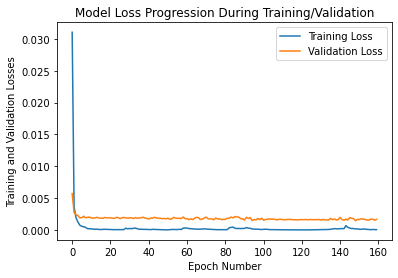

In [410]:
# import pyplot
import matplotlib.pyplot as plt

# evaluate the model
print(epochs_hist.history.keys())
print("\n\n")
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [411]:
# predict using testing set
ann_regressor_y_pred = model.predict(X_test)
np.set_printoptions(precision=2)

print(f"Numpy array of ANN Regression predicted and test values: \n\n {np.concatenate((ann_regressor_y_pred.reshape(len(ann_regressor_y_pred),1), y_test.reshape(len(y_test),1)),1)}")
print("\n")
print(f"R squared score:  {r2_score(y_test, ann_regressor_y_pred)}")

Numpy array of ANN Regression predicted and test values: 

 [[0.18 0.18]
 [0.31 0.28]
 [0.14 0.14]
 [0.18 0.18]
 [0.11 0.12]
 [0.22 0.19]
 [0.12 0.1 ]
 [0.11 0.11]
 [0.18 0.17]
 [0.1  0.13]
 [0.1  0.05]
 [0.22 0.21]
 [0.09 0.17]
 [0.32 0.37]
 [0.06 0.09]
 [0.24 0.33]
 [0.1  0.16]
 [0.25 0.21]
 [0.08 0.07]
 [0.15 0.14]
 [0.4  0.33]
 [0.09 0.11]
 [0.27 0.26]
 [0.13 0.11]
 [0.16 0.14]
 [0.16 0.24]
 [0.12 0.13]
 [0.13 0.08]
 [0.19 0.15]
 [0.18 0.18]
 [0.11 0.1 ]
 [0.13 0.14]
 [0.19 0.2 ]
 [0.11 0.11]
 [0.12 0.13]
 [0.14 0.13]
 [0.41 0.48]
 [0.07 0.07]
 [0.09 0.07]
 [0.13 0.13]
 [0.48 0.44]
 [0.26 0.4 ]
 [0.14 0.16]
 [0.1  0.12]
 [0.28 0.31]
 [0.18 0.16]
 [0.09 0.11]
 [0.37 0.42]
 [0.1  0.06]
 [0.14 0.14]
 [0.39 0.53]
 [0.13 0.08]
 [0.14 0.14]
 [0.68 1.  ]
 [0.18 0.19]
 [0.12 0.1 ]
 [0.32 0.28]
 [0.14 0.14]
 [0.22 0.26]
 [0.17 0.18]
 [0.12 0.14]
 [0.12 0.12]
 [0.19 0.2 ]
 [0.14 0.15]
 [0.37 0.33]
 [0.14 0.08]
 [0.15 0.15]
 [0.11 0.09]
 [0.14 0.16]
 [0.45 0.33]
 [0.13 0.15]
 [0.26 0.49]
 [0.

As one can notice, the following regressions models have the following accuracies:    

Random Forest Regressor - 87%    
XG Boost Regressor.     - 89%    
ANN.                    - 85%   

Since XG Boost Regressor has the best R squared score, I'll go ahead and use this regression model to predict the 'SalePrice' values of test dataset.

# 4. DATA PRE-PROCESSING RECAP

**import datasets**

In [412]:
# import dataset
train = pd.read_csv('train.csv', engine='python')
test = pd.read_csv('test.csv', engine='python')

In [413]:
# view train dataset
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [414]:
# view X_train
print(f"X_train: \n\n {X_train}")
print("\n")

X_train: 

       Street  Utilities  CentralAir  MSZoning_1  MSZoning_2  MSZoning_3  \
484        1          0           1           0           0           1   
95         1          0           1           0           0           1   
1118       1          0           1           0           0           1   
1189       1          0           1           0           0           1   
983        1          0           1           0           0           1   
...      ...        ...         ...         ...         ...         ...   
776        1          0           1           0           0           1   
1332       1          0           1           0           0           1   
243        1          0           1           0           0           1   
728        1          0           1           0           0           1   
285        1          0           1           1           0           0   

      MSZoning_4  Alley_1  Alley_2  LotShape_1  ...        26        27  \
484         

In [415]:
# view y_train
print(f"y_train: \n\n {y_train}")

y_train: 

 [[0.14]
 [0.21]
 [0.15]
 ...
 [0.12]
 [0.1 ]
 [0.18]]


In [416]:
# view test dataset
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


we'll go ahead and generate X_test from test dataset

# 5. X_test PREPARATION

split test dataset into numerical and categoorical columns

**numerical columns**

In [417]:
test_numerical = train.loc[:, ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
                               'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                               'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
                               'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
                               'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                               'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',]]

# check to see if there are any null values
test_numerical.isnull().values.any()

True

In [418]:
# replace 'nan' with '0'
train_numerical = train_numerical.fillna(0)

# check to see if any null values present
train_numerical.isnull().values.any()

False

In [419]:
# check to see if infinite values present: not null = isfinite
train_numerical.notnull().values.all()

True

In [420]:
# scale the numerical columns

# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_numerical_scaled = scaler.fit_transform(train_numerical)
test_numerical_scaled = scaler.transform(test_numerical)

# convert train_numerical_scaled to dataframe
test_numerical_scaled_dataframe = pd.DataFrame(test_numerical_scaled)

# view the dataframe
test_numerical_scaled_dataframe

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.235294,0.207668,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50
1,0.000000,0.255591,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25
2,0.235294,0.217252,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50
3,0.294118,0.191693,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00
4,0.235294,0.268371,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.198083,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,...,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25
1456,0.000000,0.271565,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,...,0.352609,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,1.00
1457,0.294118,0.210863,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,...,0.177715,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,1.00
1458,0.000000,0.217252,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.698100,...,0.169252,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,1.00


**categorical columns**

In [421]:
test_categorical = train.loc[:, ['Street', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
                                 'LotConfig', 'LandSlope','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
                                 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                                 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                                 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
                                 'KitchenQual','Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                                 'GarageQual', 'GarageCond','PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                                 'SaleType', 'SaleCondition']]

In [422]:
# check to see if there are any null values
test_categorical.isnull().values.any()

True

In [423]:
# replace 'nan' with 'none'
test_categorical = test_categorical.fillna('none')

# check to see if any null values present
test_categorical.isnull().values.any()

False

In [424]:
# check to see if infinite values present: not null = isfinite
test_categorical.notnull().values.all()

True

In [425]:
# view the categorical dataset
test_categorical

,Street,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,Pave,RL,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
1,Pave,RL,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
2,Pave,RL,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
3,Pave,RL,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,none,none,none,WD,Abnorml
4,Pave,RL,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,RL,none,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
1456,Pave,RL,none,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,none,MnPrv,none,WD,Normal
1457,Pave,RL,none,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,none,GdPrv,Shed,WD,Normal
1458,Pave,RL,none,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,none,none,none,WD,Normal


In [426]:
# encode the categorical columns of train

# street variable
label_Street = LabelEncoder()
test_categorical['Street'] = label_Street.fit_transform(test_categorical['Street'])

# MSZoning variable
label_MSZoning = LabelEncoder()
test_categorical['MSZoning'] = label_MSZoning.fit_transform(test_categorical['MSZoning'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['MSZoning'])

# Alley variable
label_Alley = LabelEncoder()
test_categorical['Alley'] = label_Alley.fit_transform(test_categorical['Alley'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['Alley'])

# LotShape variable
label_LotShape = LabelEncoder()
test_categorical['LotShape'] = label_LotShape.fit_transform(test_categorical['LotShape'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['LotShape'])

# LandContour variable
label_LandContour = LabelEncoder()
test_categorical['LandContour'] = label_LandContour.fit_transform(test_categorical['LandContour'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['LandContour'])

# Utilities variable
label_Utilities = LabelEncoder()
test_categorical['Utilities'] = label_Utilities.fit_transform(test_categorical['Utilities'])

# LotConfig variable
label_LotConfig = LabelEncoder()
test_categorical['LotConfig'] = label_LotConfig.fit_transform(test_categorical['LotConfig'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['LotConfig'])

# LandSlope variable
label_LandSlope = LabelEncoder()
test_categorical['LandSlope'] = label_LandSlope.fit_transform(test_categorical['LandSlope'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['LandSlope'])

# Neighborhood variable
label_Neighborhood = LabelEncoder()
test_categorical['Neighborhood'] = label_Neighborhood.fit_transform(test_categorical['Neighborhood'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['Neighborhood'])

# Condition1 variable
label_Condition1 = LabelEncoder()
test_categorical['Condition1'] = label_Condition1.fit_transform(test_categorical['Condition1'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['Condition1'])

# Condition2 variable
label_Condition2 = LabelEncoder()
test_categorical['Condition2'] = label_Condition2.fit_transform(test_categorical['Condition2'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['Condition2'])

# BldgType variable
label_BldgType = LabelEncoder()
test_categorical['BldgType'] = label_BldgType.fit_transform(test_categorical['BldgType'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['BldgType'])

# HouseStyle variable
label_HouseStyle = LabelEncoder()
test_categorical['HouseStyle'] = label_HouseStyle.fit_transform(test_categorical['HouseStyle'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['HouseStyle'])

# RoofStyle variable
label_RoofStyle = LabelEncoder()
test_categorical['RoofStyle'] = label_RoofStyle.fit_transform(test_categorical['RoofStyle'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['RoofStyle'])

# RoofMatl variable
label_RoofMatl = LabelEncoder()
test_categorical['RoofMatl'] = label_RoofMatl.fit_transform(test_categorical['RoofMatl'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['RoofMatl'])

# Exterior1st variable
label_Exterior1st = LabelEncoder()
test_categorical['Exterior1st'] = label_Exterior1st.fit_transform(test_categorical['Exterior1st'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['Exterior1st'])

# Exterior2nd variable
label_Exterior2nd = LabelEncoder()
test_categorical['Exterior2nd'] = label_Exterior2nd.fit_transform(test_categorical['Exterior2nd'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['Exterior2nd'])

# MasVnrType variable
label_MasVnrType = LabelEncoder()
test_categorical['MasVnrType'] = label_MasVnrType.fit_transform(test_categorical['MasVnrType'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['MasVnrType'])

# ExterQual variable
label_ExterQual = LabelEncoder()
test_categorical['ExterQual'] = label_ExterQual.fit_transform(test_categorical['ExterQual'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['ExterQual'])

# ExterCond variable
label_ExterCond = LabelEncoder()
test_categorical['ExterCond'] = label_ExterCond.fit_transform(test_categorical['ExterCond'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['ExterCond'])

# Foundation variable
label_Foundation = LabelEncoder()
test_categorical['Foundation'] = label_Foundation.fit_transform(test_categorical['Foundation'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['Foundation'])

# BsmtQual variable
label_BsmtQual = LabelEncoder()
test_categorical['BsmtQual'] = label_BsmtQual.fit_transform(test_categorical['BsmtQual'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['BsmtQual'])

# BsmtCond variable
label_BsmtCond = LabelEncoder()
test_categorical['BsmtCond'] = label_BsmtCond.fit_transform(test_categorical['BsmtCond'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['BsmtCond'])

# BsmtExposure variable
label_BsmtExposure = LabelEncoder()
test_categorical['BsmtExposure'] = label_BsmtExposure.fit_transform(test_categorical['BsmtExposure'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['BsmtExposure'])

# BsmtFinType1 variable
label_BsmtFinType1 = LabelEncoder()
test_categorical['BsmtFinType1'] = label_BsmtFinType1.fit_transform(test_categorical['BsmtFinType1'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['BsmtFinType1'])

# BsmtFinType2 variable
label_BsmtFinType2 = LabelEncoder()
test_categorical['BsmtFinType2'] = label_BsmtFinType2.fit_transform(test_categorical['BsmtFinType2'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['BsmtFinType2'])

# Heating variable
label_Heating = LabelEncoder()
test_categorical['Heating'] = label_Heating.fit_transform(test_categorical['Heating'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['Heating'])

# HeatingQC variable
label_HeatingQC = LabelEncoder()
test_categorical['HeatingQC'] = label_HeatingQC.fit_transform(test_categorical['HeatingQC'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['HeatingQC'])

# CentralAir variable
label_CentralAir = LabelEncoder()
test_categorical['CentralAir'] = label_CentralAir.fit_transform(test_categorical['CentralAir'])

# Electrical variable
label_Electrical = LabelEncoder()
test_categorical['Electrical'] = label_Electrical.fit_transform(test_categorical['Electrical'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['Electrical'])

# KitchenQual variable
label_KitchenQual = LabelEncoder()
test_categorical['KitchenQual'] = label_KitchenQual.fit_transform(test_categorical['KitchenQual'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['KitchenQual'])

# FireplaceQu variable
label_FireplaceQu = LabelEncoder()
test_categorical['FireplaceQu'] = label_FireplaceQu.fit_transform(test_categorical['FireplaceQu'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['FireplaceQu'])

# GarageType variable
label_GarageType = LabelEncoder()
test_categorical['GarageType'] = label_GarageType.fit_transform(test_categorical['GarageType'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['GarageType'])

# GarageFinish variable
label_GarageFinish = LabelEncoder()
test_categorical['GarageFinish'] = label_GarageFinish.fit_transform(test_categorical['GarageFinish'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['GarageFinish'])

# GarageQual variable
label_GarageQual = LabelEncoder()
test_categorical['GarageQual'] = label_GarageQual.fit_transform(test_categorical['GarageQual'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['GarageQual'])

# GarageCond variable
label_GarageCond = LabelEncoder()
test_categorical['GarageCond'] = label_GarageCond.fit_transform(test_categorical['GarageCond'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['GarageCond'])

# PavedDrive variable
label_PavedDrive = LabelEncoder()
test_categorical['PavedDrive'] = label_PavedDrive.fit_transform(test_categorical['PavedDrive'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['PavedDrive'])

# PoolQC variable
label_PoolQC = LabelEncoder()
test_categorical['PoolQC'] = label_PoolQC.fit_transform(test_categorical['PoolQC'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['PoolQC'])

# Fence variable
label_Fence = LabelEncoder()
test_categorical['Fence'] = label_Fence.fit_transform(test_categorical['Fence'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['Fence'])

# MiscFeature variable
label_MiscFeature = LabelEncoder()
test_categorical['MiscFeature'] = label_MiscFeature.fit_transform(test_categorical['MiscFeature'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['MiscFeature'])

# SaleType variable
label_SaleType = LabelEncoder()
test_categorical['SaleType'] = label_SaleType.fit_transform(test_categorical['SaleType'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['SaleType'])

# Functional variable
label_SaleCondition = LabelEncoder()
test_categorical['Functional'] = label_SaleCondition.fit_transform(test_categorical['Functional'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['Functional'])

# SaleCondition variable
label_SaleCondition = LabelEncoder()
test_categorical['SaleCondition'] = label_SaleCondition.fit_transform(test_categorical['SaleCondition'])
test_categorical = pd.get_dummies(test_categorical, drop_first = True, columns = ['SaleCondition'])

# view the encoded categorical dataset
test_categorical

,Street,Utilities,CentralAir,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Alley_1,Alley_2,LotShape_1,...,Functional_2,Functional_3,Functional_4,Functional_5,Functional_6,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1456,1,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1457,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1458,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


**combine the SalePrice, train_numerical_scaled_dataframe, and train_categorical columns**

In [427]:
dataset = pd.concat([test_categorical, test_numerical_scaled_dataframe], 1)

# view the dataset
dataset

,Street,Utilities,CentralAir,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Alley_1,Alley_2,LotShape_1,...,26,27,28,29,30,31,32,33,34,35
0,1,0,1,0,0,1,0,0,1,0,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50
1,1,0,1,0,0,1,0,0,1,0,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25
2,1,0,1,0,0,1,0,0,1,0,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50
3,1,0,1,0,0,1,0,0,1,0,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00
4,1,0,1,0,0,1,0,0,1,0,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,1,0,0,1,0,0,1,0,...,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25
1456,1,0,1,0,0,1,0,0,1,0,...,0.352609,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,1.00
1457,1,0,1,0,0,1,0,0,1,0,...,0.177715,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,1.00
1458,1,0,1,0,0,1,0,0,1,0,...,0.169252,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,1.00


**independent variables**

In [428]:
X_test = dataset

# 6. IMPLEMENT REGRESSION MODELS

**X_train, X_test, y_train**

In [429]:
print(f"X_train: \n\n {X_train}")
print("\n")
print(f"X_test: \n\n {X_test}")
print("\n")
print(f"y_train: \n\n {y_train}")

X_train: 

       Street  Utilities  CentralAir  MSZoning_1  MSZoning_2  MSZoning_3  \
484        1          0           1           0           0           1   
95         1          0           1           0           0           1   
1118       1          0           1           0           0           1   
1189       1          0           1           0           0           1   
983        1          0           1           0           0           1   
...      ...        ...         ...         ...         ...         ...   
776        1          0           1           0           0           1   
1332       1          0           1           0           0           1   
243        1          0           1           0           0           1   
728        1          0           1           0           0           1   
285        1          0           1           1           0           0   

      MSZoning_4  Alley_1  Alley_2  LotShape_1  ...        26        27  \
484         

**XG Boost Regressor**

In [441]:
# predict using testing set
xg_boost_regressor_y_pred = xg_boost_regressor.predict(X_test)

# convert the predicted values back to the original values
predicted_values_array = scaler_y.inverse_transform(xg_boost_regressor_y_pred.reshape(-1,1))

# convert the predicted values to dataframe
predicted_values = pd.DataFrame(predicted_values_array)

# rename the column and index
predicted_values = predicted_values.rename(columns = {0: 'SalePrice'})
predicted_values.index.name = 'Id'

print(f"XG boost Regressor predicted values: ")
predicted_values

XG boost Regressor predicted values: 


,SalePrice
Id,
0,198952.968750
1,181705.906250
2,223695.375000
3,195337.671875
4,250184.375000
...,...
1455,166674.265625
1456,209698.687500
1457,266676.343750


In [450]:
# merge 'Id' and 'predicted_values'
SalePrices = pd.concat([pd.DataFrame(test.loc[:, 'Id']), predicted_values], 1)

# view the dataset
SalePrices

,Id,SalePrice
0,1461.0,198952.968750
1,1462.0,181705.906250
2,1463.0,223695.375000
3,1464.0,195337.671875
4,1465.0,250184.375000
...,...,...
1455,2916.0,166674.265625
1456,2917.0,209698.687500
1457,2918.0,266676.343750
1458,2919.0,142902.984375


In [466]:
SalePrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   float64
 1   SalePrice  1460 non-null   float32
dtypes: float32(1), float64(1)
memory usage: 17.2 KB


In [465]:
# export dataframe to csv 
SalePrices.to_csv('Predicted_values.csv', index=False)